In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(2137)

In [6]:
def calculate_h(m, x):
    V = 1/(m-1) * np.sum(np.power(x,2)) - 1/(m*(m-1))*(np.sum(x)**2)

    sigma = np.sqrt(V)
    c8 = 105/(32 * np.sqrt(np.pi) * sigma**9 )

    K_6 = -15/np.sqrt(2*np.pi)
    U_K = 1

    hII = ((-2*K_6)/(U_K*c8*m))**(1/9)

    def K_6_x(x):
        return 1/(np.sqrt(2*np.pi)) * (x**6 - 15*x**4 + 45*x**2-15) * np.exp(-1/2*x**2) 
    xi = 6
    C_6_hII = 1/(m**2 * hII**(xi+1)) * np.sum([np.sum([K_6_x((x_i-x_j)/hII) for x_j in x]) for x_i in x ])

    K_4 = 3/(np.sqrt(2*np.pi))
    hI = ((-2*K_4)/(U_K*C_6_hII*m))**(1/7)

    def K_4_x(x):
        return 1/(np.sqrt(2*np.pi)) * (x**4 - 6*x**2 + 3) * np.exp(-1/2*x**2) 
    xi = 4
    C_4_hI = 1/(m**2 * hI**(xi+1)) * np.sum([np.sum([K_4_x((x_i-x_j)/hI) for x_j in x]) for x_i in x ])

    Z_f = C_4_hI

    U_K = 1
    W_K = 1/(2*np.sqrt(np.pi))
    h=( (W_K)/(U_K**2 * Z_f * m) )**(1/5)
    
    return h

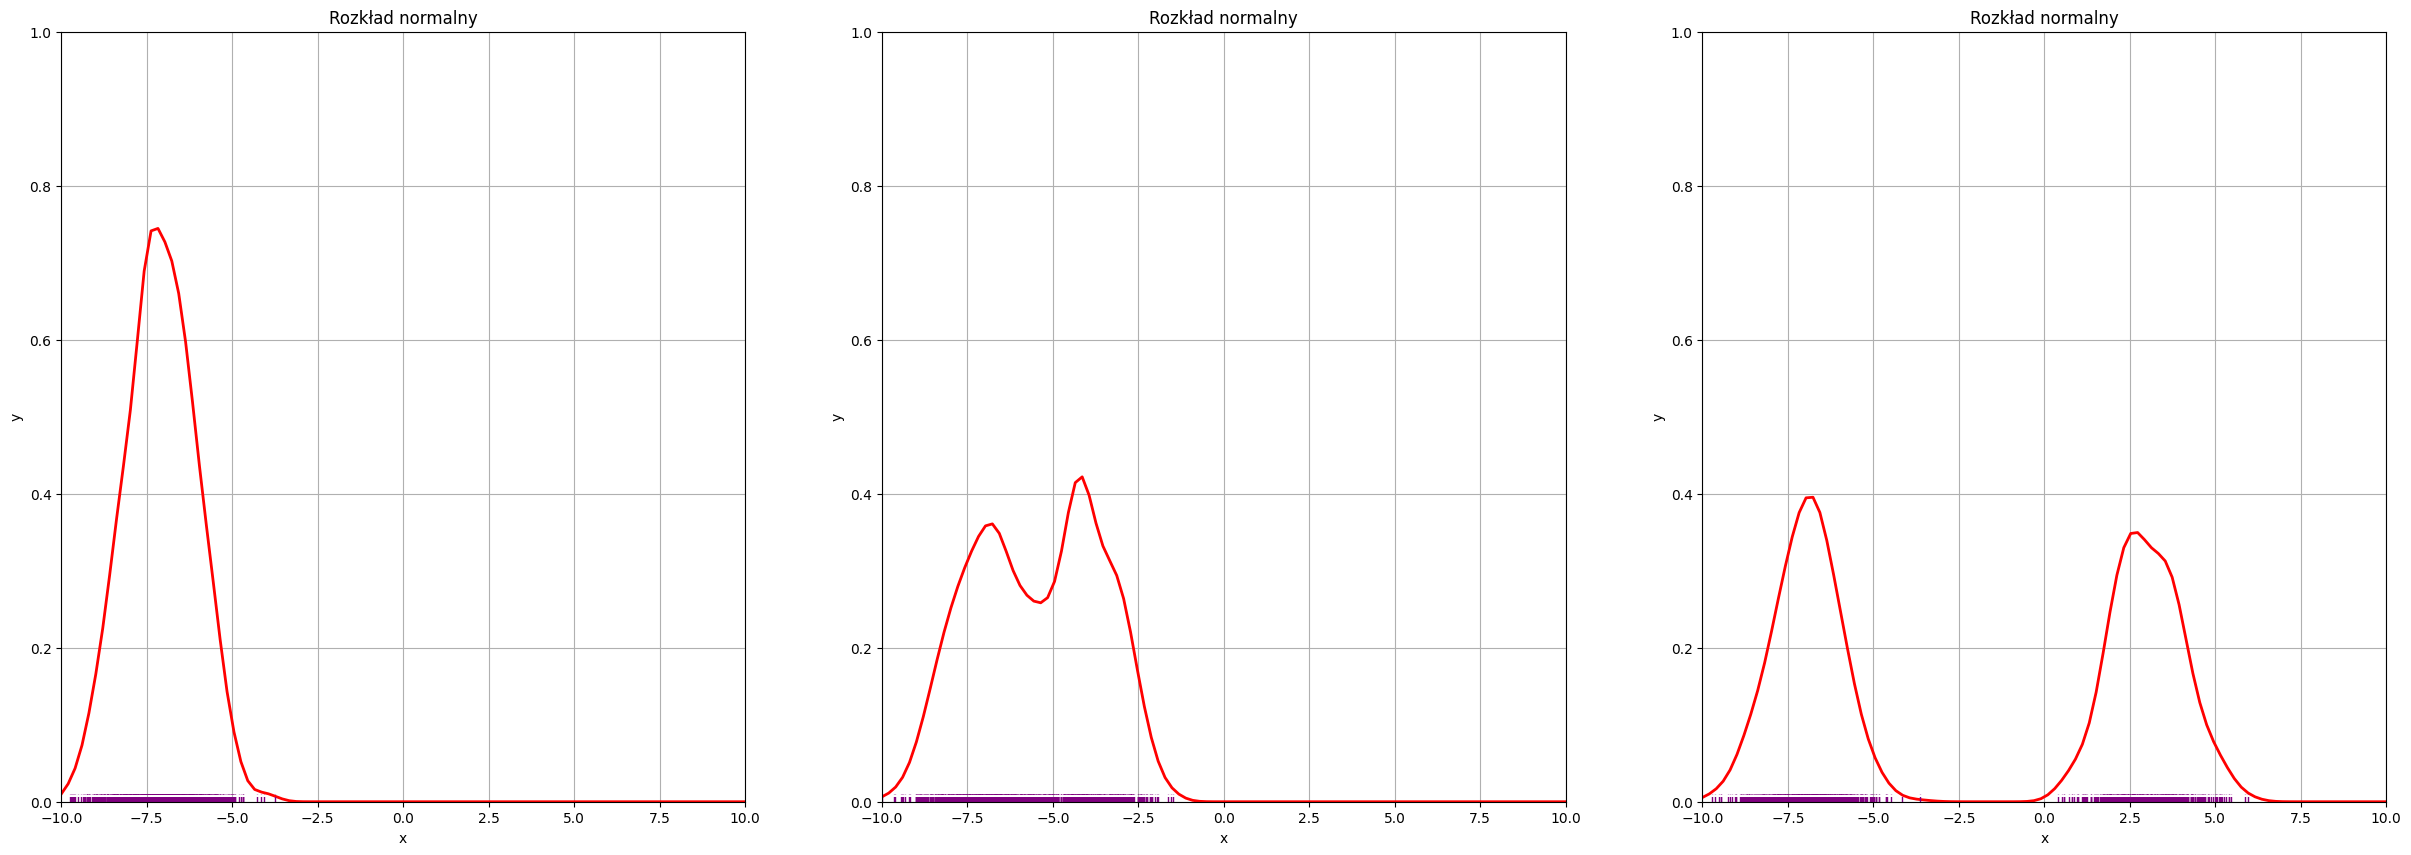

In [7]:
m = 1000

ms = (int(0.6*m), int(0.4*m))

plt.figure(figsize = (30, 10)) 

for i, Xis in enumerate([[np.random.normal(-7, 1, ms[0]), np.random.normal(-7,1, ms[1])],
                         [np.random.normal(-7, 1, ms[0]), np.random.normal(-4,1, ms[1])],
                         [np.random.normal(-7, 1, ms[0]), np.random.normal(3,1, ms[1])]]):
       Xi = np.concatenate(Xis)
       h = calculate_h(m, Xi)
       x = np.linspace(-10.0, 10.0, num=100)
       y = np.sum(np.stack([1/(m_i*h*np.sqrt(2*np.pi))*sum(map(lambda x_i: np.exp(-((x-x_i)/h)**2/2), xi)) for m_i, xi in zip(ms ,Xis)]), axis=0)
       
       plt.subplot(1, 3, i+1)
       plt.plot(x, y, linewidth=2, color='r')
       plt.vlines(x=Xi, ymin=-0.01, ymax=0.01, colors='purple', ls='--', lw=1, label='vline_multiple - full height')
       plt.title("Rozkład normalny")
       plt.xlabel("x")
       plt.ylabel("y")
       plt.xlim([-10, 10])
       plt.ylim([0, 1])
       plt.grid()

plt.show()

In [56]:
def find_outliners_element_k_nearest_neighborhood(x, k, m, r):
    def find_k_nearest_neighbors(point, points, k):
        distances = np.abs(points - point)
        nearest_indices = np.argsort(distances)
        return nearest_indices[1:k+1]

    k_nearest_neighborhood = np.array([find_k_nearest_neighbors(i, x, k) for i in x])
    distances_to_k_neighbor = np.array([x[indices[-1]] - point for point, indices in zip(x, k_nearest_neighborhood)])
    indices_furthest_k = np.argsort(-np.abs(distances_to_k_neighbor))[:int(m*r)]
    furthest_k_points = x[indices_furthest_k]

    return furthest_k_points

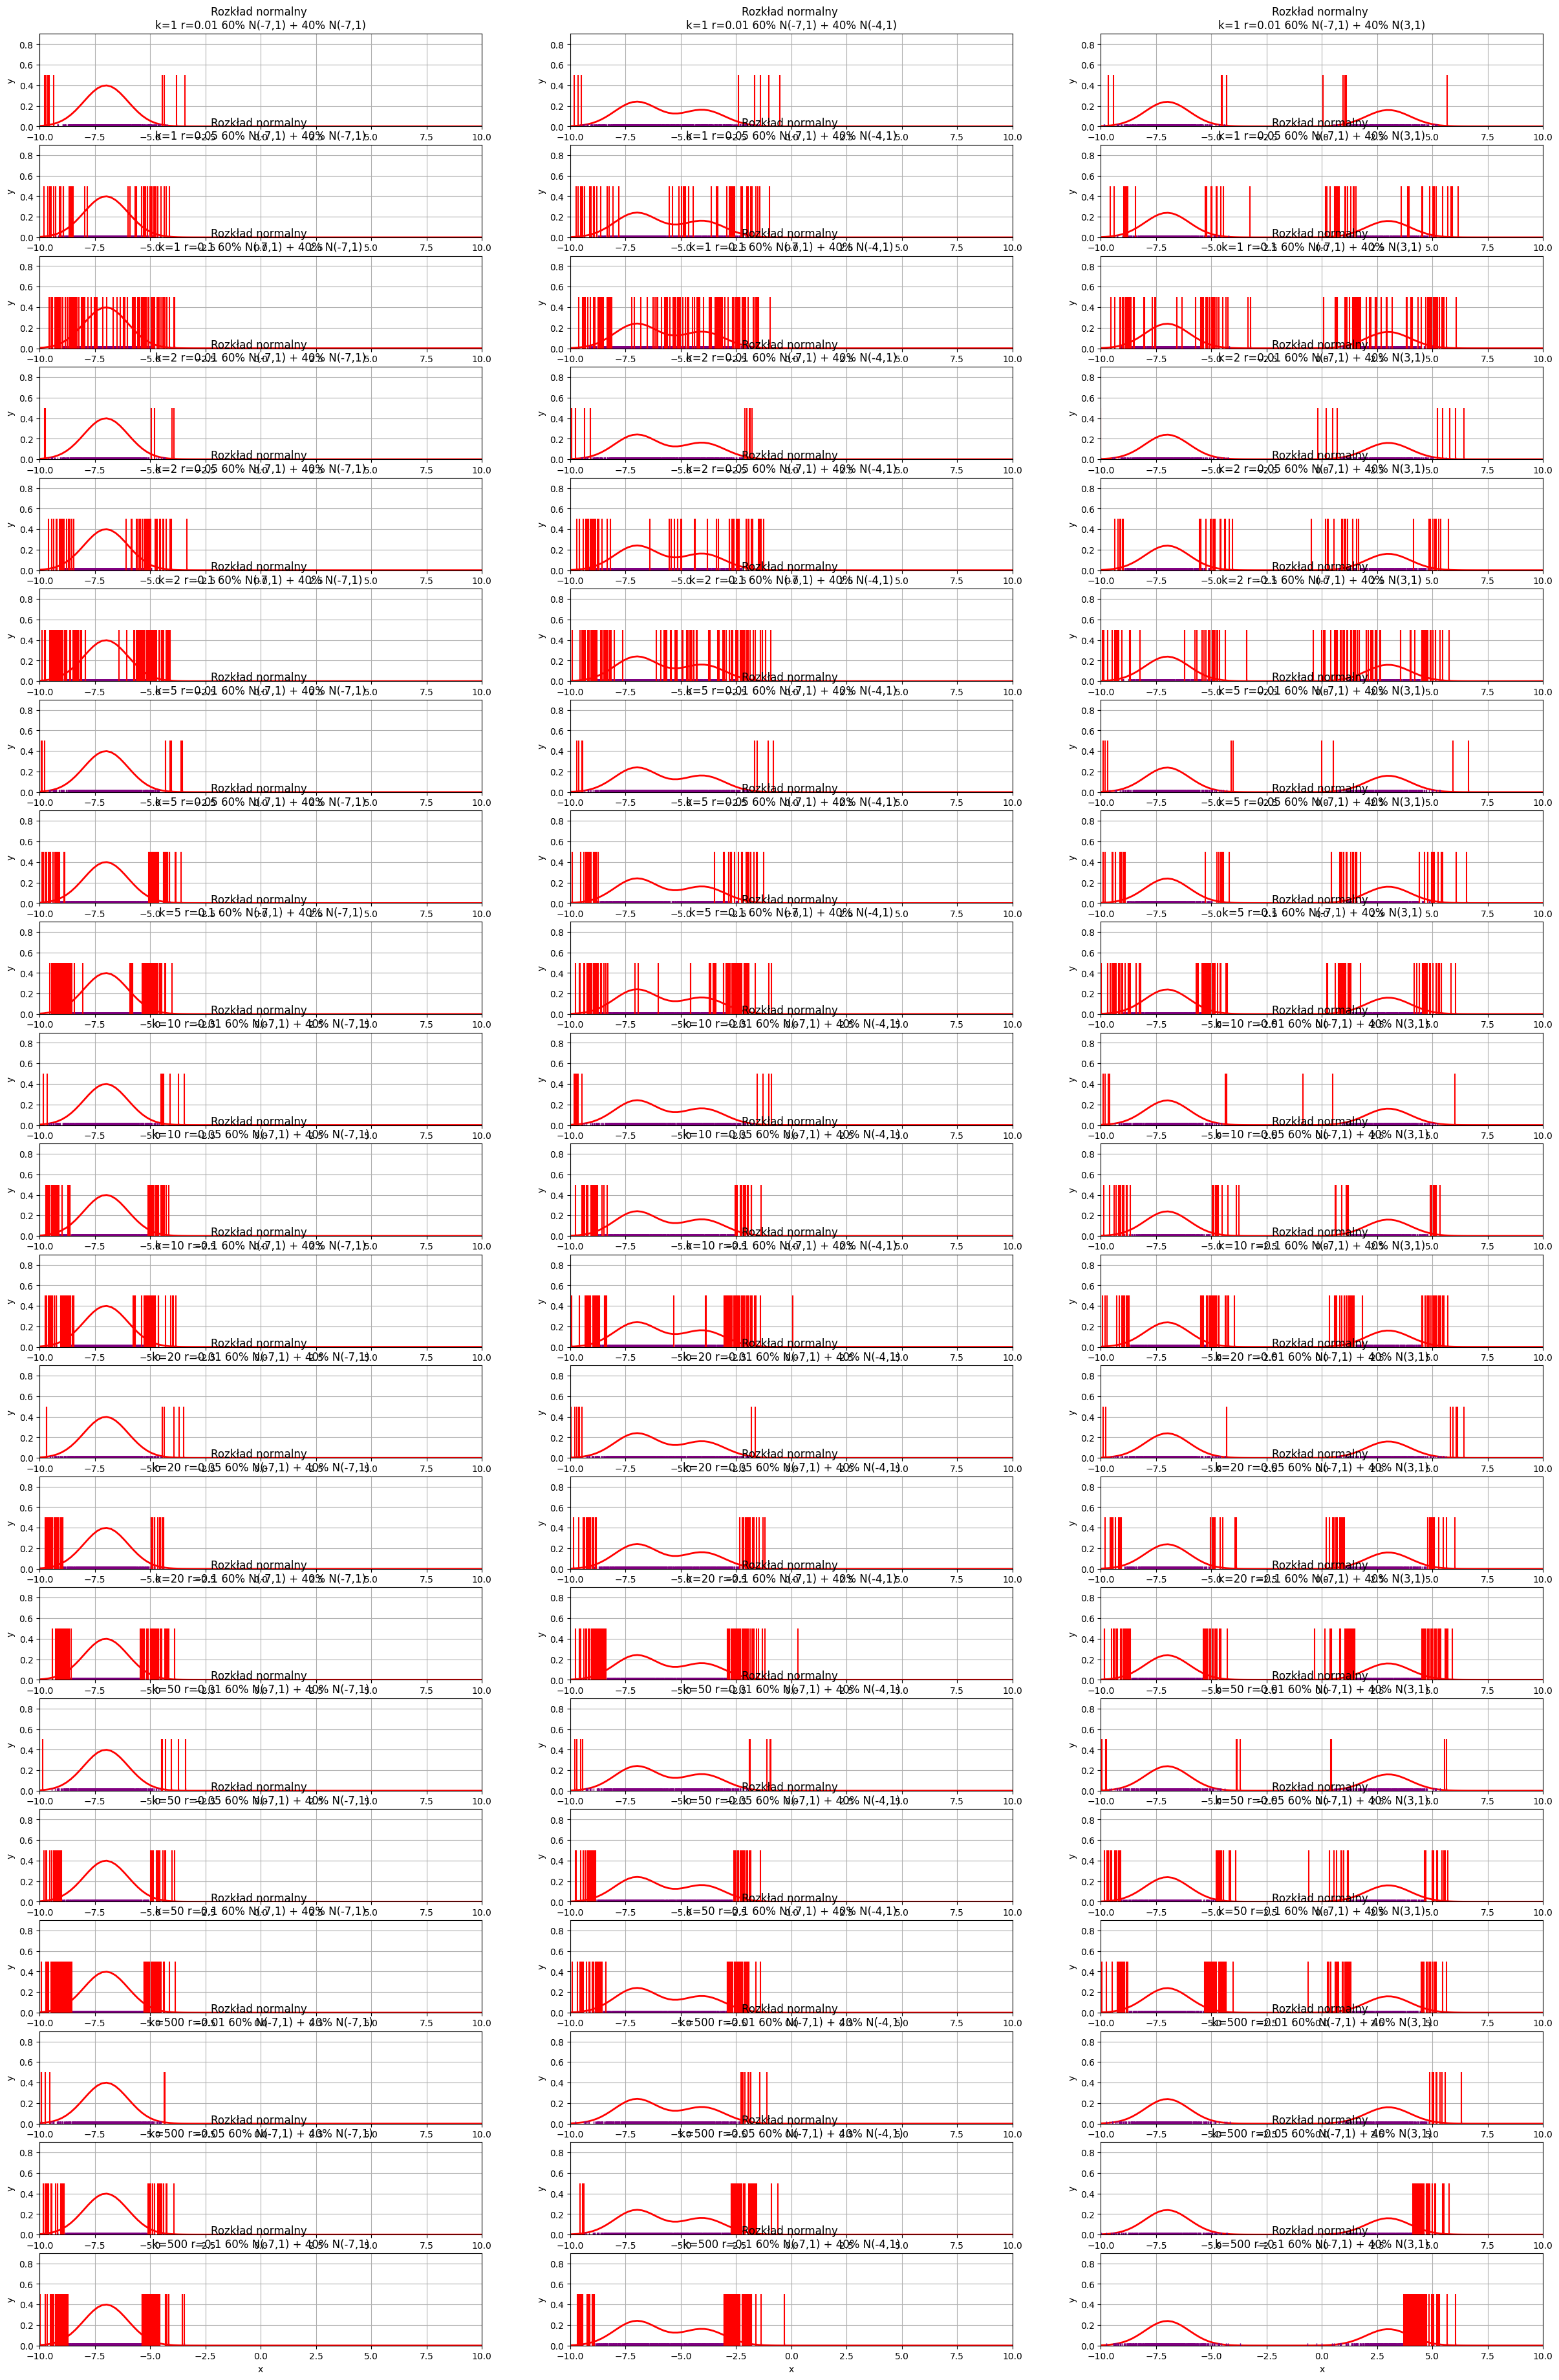

In [110]:
m = 1000

sigma = 1
w1 = 0.6
w2 = 0.4
ms = (int(w1*m), int(w2*m))

plt.figure(figsize = (30, 140)) 

for i, k in enumerate([1, 2, 5, 10, 20, 50, 500]):
    for j, r in enumerate([0.01, 0.05, 0.1]):
        for u, (mu1, mu2) in enumerate(zip([-7, -7, -7], 
                                           [-7, -4, 3])):
            Xis = np.random.normal(mu1, sigma, ms[0]), np.random.normal(mu2,sigma, ms[1])
            Xi = np.concatenate(Xis)
            furthest_k_points = find_outliners_element_k_nearest_neighborhood(Xi, k, m, r)
            h = calculate_h(m, Xi)
            x = np.linspace(-10.0, 10.0, num=100)
            y = w1/(np.sqrt(2 * np.pi)) * np.exp(- ( x - mu1)**2 / (2 * sigma**2)) + w2/(np.sqrt(2 * np.pi)) * np.exp(- ( x - mu2)**2 / (2 * sigma**2))    
            
            plt.subplot(7*3*3, 3, u + 1 + j * 3 + i * 9)
            plt.plot(x, y, linewidth=2, color='r')
            plt.vlines(x=Xi, ymin=-0.01, ymax=0.03, colors='purple', ls='--', lw=1, label='vline_multiple - full height')
            plt.vlines(x=furthest_k_points, ymin=-0.01, ymax=0.5, colors='red', ls='-')
            plt.title(f"Rozkład normalny \nk={k} r={r} 60% N({mu1},{sigma}) + 40% N({mu2},{sigma})")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.xlim([-10, 10])
            plt.ylim([0, 0.9])
            plt.grid()
        
plt.show()